## Dragon Real Estate - Price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
housing.hist(bins=50)
plt.show()

## Train-Test Splitting

In [9]:
#For Learning Purpose
import numpy as np
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    np.random.seed(40)
    print("Shuffled")
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set, test_set = split_train_test(housing,0.2)
#print(f"Rows in train set: {len(train_set)}")
#print(f"Rows in test set: {len(test_set)}")

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}"); print(f"Rows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [15]:
#95/7

In [16]:
#376/28

In [17]:
housing = strat_train_set.copy()

## Looking for Coorelation

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

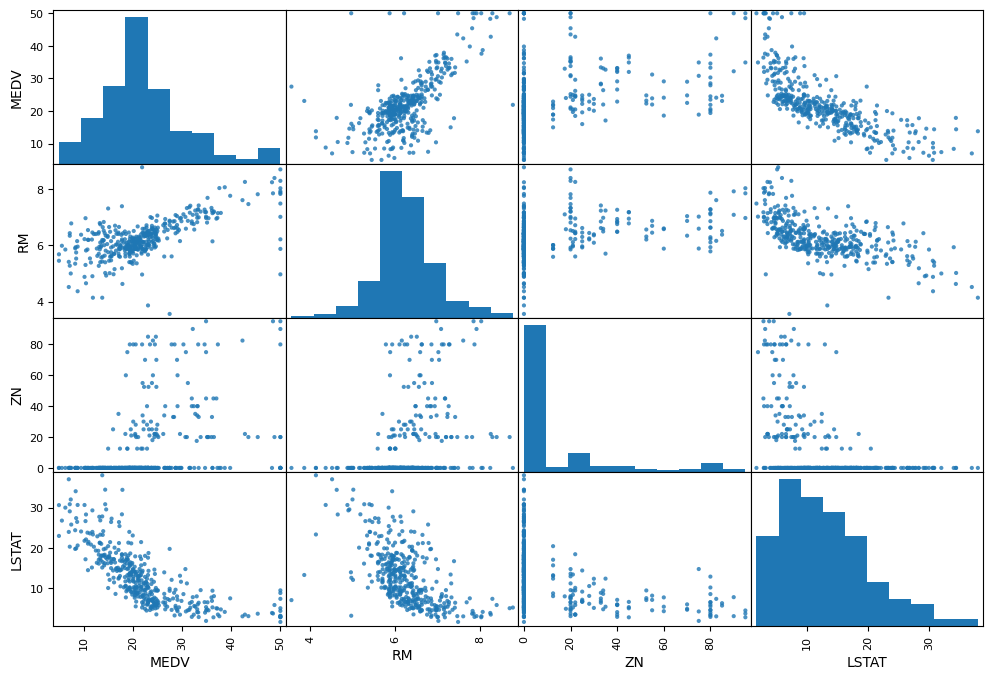

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.8)

<Axes: xlabel='RM', ylabel='MEDV'>

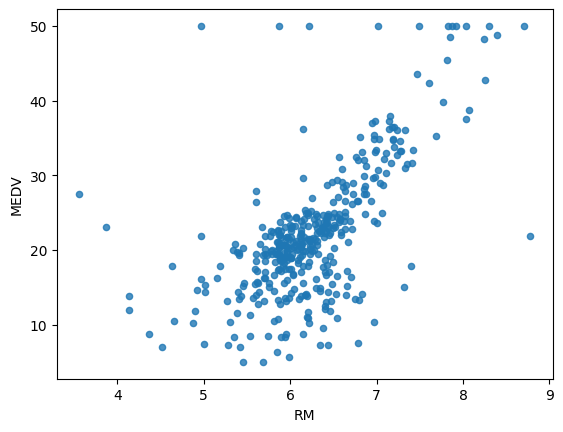

In [19]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying Out Attributes Combinations

In [20]:
housing['TAXRM']= housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
311,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304,18.4,396.90,5.98,22.1,49.656975
133,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,18.4,75.060117
85,0.05735,0.0,4.49,0,0.449,6.630,56.1,4.4377,3,247,18.5,392.30,6.53,26.6,37.254902
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10,36.5,36.636137
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.657152
ZN         0.406966
B          0.331373
DIS        0.284888
CHAS       0.124055
RAD       -0.386234
CRIM      -0.401195
AGE       -0.416527
NOX       -0.453438
PTRATIO   -0.477832
TAX       -0.482119
INDUS     -0.530784
TAXRM     -0.538607
LSTAT     -0.740449
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

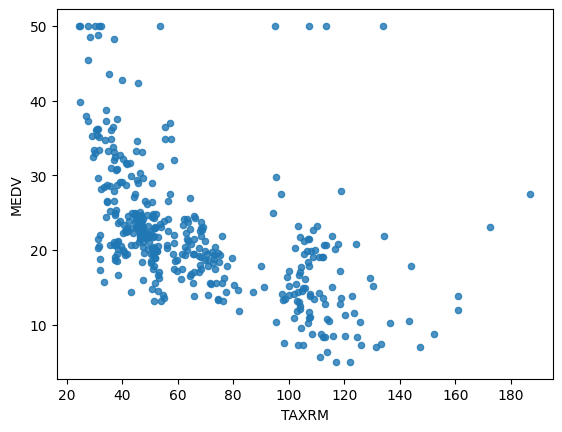

In [22]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

## Missing Attributes

In [23]:
# To take care of missing attributes, You have three Options:
#     1. Get rid of the missing data points.
#     2. Get rid of the whole attribute.
#     3. Set the value to some value(0, mean or median)

In [24]:
a=housing.dropna(subset=["RM"]) # Option 1
a.shape
# Note that the original housing dataframe remain unchanged

(400, 15)

In [25]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM Column and also note that the original housing dataframe remain unchanged

(404, 14)

In [32]:
median = housing["RM"].median() # Option 3

In [27]:
housing["RM"].fillna(median) # Compute median for option 3
# Note that the original housing dataframe remain unchanged

311    6.122
133    5.822
85     6.630
264    7.206
4      7.147
       ...  
406    4.138
460    6.701
494    5.926
54     5.888
409    6.852
Name: RM, Length: 404, dtype: float64

In [33]:
housing.shape

(404, 15)

In [34]:
housing.describe() # before we start filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000
mean,3.900205,11.388614,11.245099,0.069307,0.558175,6.256085,68.965099,3.763339,9.517327,407.792079,18.456683,356.985297,12.884084,22.158168,67.149175
std,9.363700,23.073380,6.935050,0.254290,0.119275,0.697134,28.138251,2.082292,8.752012,169.037140,2.166856,90.138428,7.145991,8.823326,31.775180
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.078935,0.000000,5.190000,0.000000,0.449000,5.879750,45.325000,2.005925,4.000000,277.000000,17.400000,374.710000,7.187500,17.075000,43.282507
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.183500,78.400000,3.207450,5.000000,335.000000,18.950000,392.015000,11.655000,20.950000,53.858803
75%,3.681942,12.500000,18.100000,0.000000,0.635000,6.590750,94.300000,5.117025,24.000000,666.000000,20.200000,396.307500,17.127500,24.800000,97.608045
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([2.53715000e-01, 0.00000000e+00, 9.79500000e+00, 0.00000000e+00,
       5.38000000e-01, 6.18350000e+00, 7.84000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.35000000e+02, 1.89500000e+01, 3.92015000e+02,
       1.16550000e+01, 2.09500000e+01, 5.38588025e+01])

In [30]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.900205,11.388614,11.245099,0.069307,0.558175,6.255366,68.965099,3.763339,9.517327,407.792079,18.456683,356.985297,12.884084,22.158168,67.017587
std,9.363700,23.073380,6.935050,0.254290,0.119275,0.693703,28.138251,2.082292,8.752012,169.037140,2.166856,90.138428,7.145991,8.823326,31.644533
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.078935,0.000000,5.190000,0.000000,0.449000,5.883000,45.325000,2.005925,4.000000,277.000000,17.400000,374.710000,7.187500,17.075000,43.430372
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.183500,78.400000,3.207450,5.000000,335.000000,18.950000,392.015000,11.655000,20.950000,53.858803
75%,3.681942,12.500000,18.100000,0.000000,0.635000,6.581750,94.300000,5.117025,24.000000,666.000000,20.200000,396.307500,17.127500,24.800000,97.265466
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


## Scikit-Learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameters based on a datasets Eg. imputer. It has a for method and transformer method. Fit methods - Fits the          dataset and calculates internal parameters.
2. Transformers - Transform method take input and returns output based on the learnings from fit(). It also has a convenience function called             fit_trasform() which fits and then transforms.
3. Predictors - LinearRegression is an example of predictor. fit() and predict() are two common functions. It also gives score() funtiom which also
   evaluate the predictions

## Feature Scaling

## Creating a Pipeline